In [17]:
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
import PIL.Image as Image
%matplotlib inline

In [18]:
Animaldir = "raw-img" #Image local directories
Test_Animal_dir = 'raw2-img'

In [19]:
batch_size = 32 #Imports image from local directory at our prefered size
img_height = 192
img_width = 192
img_size = (192,192)

train_animals = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  subset="training",
  shuffle = True,
  seed = 123,
  image_size=img_size,
  batch_size=batch_size)

val_animals = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  shuffle = True,
  seed = 123,
  subset="validation",
  image_size=img_size,
  batch_size=batch_size)


Found 18686 files belonging to 10 classes.
Using 14949 files for training.
Found 18686 files belonging to 10 classes.
Using 3737 files for validation.


In [20]:
class_names = np.array(train_animals.class_names) #Gets the array of class names
num_classes = len(class_names)

In [21]:
model_overfit = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #Our second model will take you even longer around 10 min
  layers.Conv2D(16, 3, padding='same', activation='relu'), #This just adds 2 extra hidden layers will larger filter sizes
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_overfit.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_overfit.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 192, 192, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 96, 96, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)       

In [22]:
results_2 = model_overfit.fit(train_animals, #This will take you 10 minutes to run, may be more depending on processing speed
                    epochs=10,
                    validation_data=val_animals)

Epoch 1/10
468/468 [==============================] - 131s 280ms/step - loss: 1.9031 - accuracy: 0.3194 - val_loss: 1.6415 - val_accuracy: 0.4255
Epoch 2/10
468/468 [==============================] - 133s 283ms/step - loss: 1.3664 - accuracy: 0.5327 - val_loss: 1.3593 - val_accuracy: 0.5339
Epoch 3/10
468/468 [==============================] - 133s 285ms/step - loss: 1.0075 - accuracy: 0.6584 - val_loss: 1.3607 - val_accuracy: 0.5729
Epoch 4/10
468/468 [==============================] - 134s 286ms/step - loss: 0.6508 - accuracy: 0.7813 - val_loss: 1.5657 - val_accuracy: 0.5550
Epoch 5/10
468/468 [==============================] - 135s 288ms/step - loss: 0.3784 - accuracy: 0.8754 - val_loss: 1.8676 - val_accuracy: 0.5692
Epoch 6/10
468/468 [==============================] - 134s 286ms/step - loss: 0.2074 - accuracy: 0.9328 - val_loss: 2.4176 - val_accuracy: 0.5427
Epoch 7/10
468/468 [==============================] - 135s 289ms/step - loss: 0.1367 - accuracy: 0.9576 - val_loss: 2.4518 -

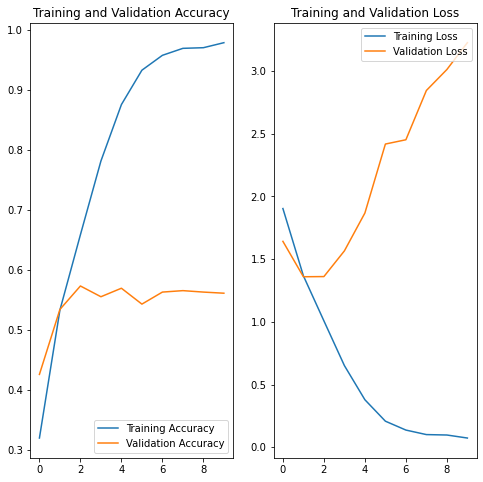

In [23]:
acc = results_2.history['accuracy'] #Plots performance
val_acc = results_2.history['val_accuracy']

loss = results_2.history['loss']
val_loss = results_2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()